In [31]:
import numpy as np         # библиотека для матриц и математики
import pandas as pd        # библиотека для работы с табличками
from scipy import stats    # модуль для работы со статистикой

# библиотеки для визуализации
import matplotlib.pyplot as plt
import seaborn as sns

import math

from statsmodels.stats.weightstats import ztest as ztest

plt.style.use('ggplot')    # стиль графиков

%matplotlib inline

In [32]:
n = 300

#for X
sample1 = stats.uniform(loc=5, scale=10).rvs(n)

mean1 = np.mean(sample1)
var1 = np.var(sample1, ddof = 1)
std1 = np.std(sample1)

print("X1: mean1 = %.3f; var1 = %.3f; std1 = %.3f; n = %.3f" % (mean1, var1, std1, n))

X1: mean1 = 9.946; var1 = 8.229; std1 = 2.864; n = 300.000


In [33]:
#for Y

sample2 = stats.norm(loc=10, scale=5).rvs(n)

mean2 = np.mean(sample2)
var2 = np.var(sample2, ddof = 1)
std2 = np.std(sample2)

print("Y: mean1 = %.3f; var2 = %.3f; std2 = %.3f; n = %.3f" % (mean2, var2, std2, n))

Y: mean1 = 10.049; var2 = 26.546; std2 = 5.144; n = 300.000


In [35]:
#KK

r = stats.pearsonr(sample1, sample2)
p = stats.spearmanr(sample1, sample2) #спирмен
t = stats.kendalltau(sample1, sample2) #кендалл
print(r)
print(p)
print(t)

PearsonRResult(statistic=0.0128596111032932, pvalue=0.8244584283591069)
SignificanceResult(statistic=0.009011211235680397, pvalue=0.8764820714186917)
SignificanceResult(statistic=0.005752508361204014, pvalue=0.8818791980942491)


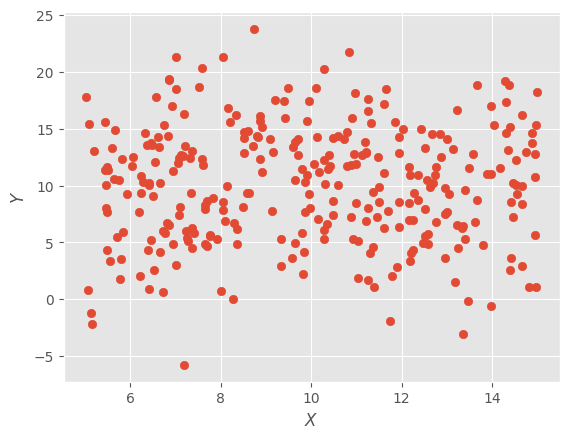

In [36]:
plt.scatter(sample1, sample2)
plt.ylabel('$Y$')
plt.xlabel('$X$');

array([[ 2., 18., 21., 19.,  4.],
       [ 2., 12., 20., 22.,  4.],
       [ 0.,  9., 24., 20.,  5.],
       [ 1., 16., 29., 19.,  1.],
       [ 3., 10., 19., 16.,  4.]])

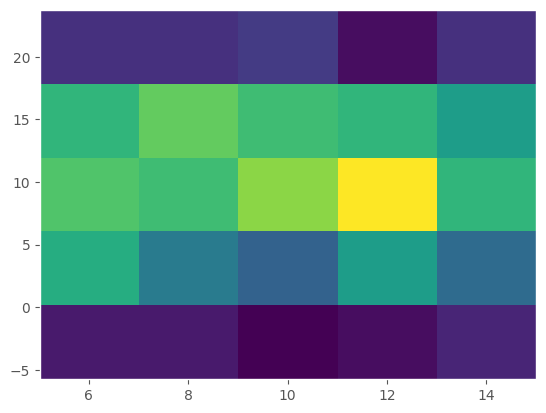

In [37]:
res = plt.hist2d(sample1, sample2, bins = 5)
res[0]

In [38]:
(np.max(sample1)-np.min(sample1))/5

1.9952056457434906

In [39]:
print(np.max(sample1))
print(np.min(sample1))

14.99786498463603
5.021836755918575


In [40]:
(np.max(sample2)-np.min(sample2))/5

5.907504267020959

In [41]:
print(np.max(sample2))
print(np.min(sample2))

23.772043811882405
-5.765477523222394


In [42]:
chi2, pv, ddof, array = stats.chi2_contingency(res[0])
print(chi2, pv)
array

12.227001840642394 0.7282111115625282


array([[ 1.70666667, 13.86666667, 24.10666667, 20.48      ,  3.84      ],
       [ 1.6       , 13.        , 22.6       , 19.2       ,  3.6       ],
       [ 1.54666667, 12.56666667, 21.84666667, 18.56      ,  3.48      ],
       [ 1.76      , 14.3       , 24.86      , 21.12      ,  3.96      ],
       [ 1.38666667, 11.26666667, 19.58666667, 16.64      ,  3.12      ]])

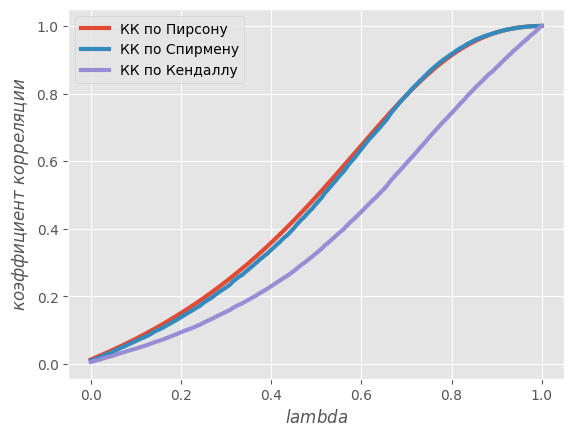

In [43]:
x = np.linspace(0, 1, 300)
y = []
y_p = []
y_t = []

for j in range(0, 300):
  sample_U = []
  lam = x[j]
  for i in range(0, 300):
    u = lam * sample1[i] + (1 - lam) * sample2[i]
    sample_U.append(u)
  r = stats.pearsonr(sample1, sample_U)[0]
  p = stats.spearmanr(sample1, sample_U)[0]
  t = stats.kendalltau(sample1, sample_U)[0]

  y.append(r)
  y_p.append(p)
  y_t.append(t)

plt.plot(x, y, lw=3, label="КК по Пирсону")
plt.plot(x, y_p, lw=3, label = "КК по Спирмену")
plt.plot(x, y_t, lw=3, label = "КК по Кендаллу")
plt.legend();

plt.ylabel('$коэффициент$ $корреляции$')
plt.xlabel('$lambda$');

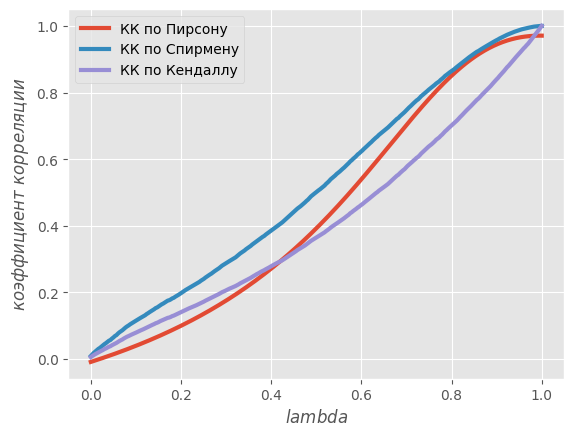

In [44]:
x = np.linspace(0, 1, 300)
y = []
y_p = []
y_t = []

for j in range(0, 300):
  sample_U = []
  lam = x[j]
  for i in range(0, 300):
    u = lam * (sample1[i]**3) + (1 - lam) * sample2[i]**3
    sample_U.append(u)
  r = stats.pearsonr(sample1, sample_U)[0]
  p = stats.spearmanr(sample1, sample_U)[0]
  t = stats.kendalltau(sample1, sample_U)[0]

  y.append(r)
  y_p.append(p)
  y_t.append(t)

plt.plot(x, y, lw=3, label="КК по Пирсону")
plt.plot(x, y_p, lw=3, label = "КК по Спирмену")
plt.plot(x, y_t, lw=3, label = "КК по Кендаллу")
plt.legend();

plt.ylabel('$коэффициент$ $корреляции$')
plt.xlabel('$lambda$');

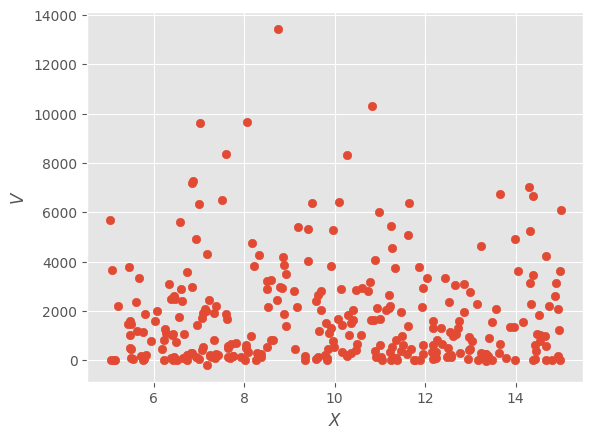

In [45]:
lam = 0
sample_U = []
for i in range(0, 300):
    u = lam * (sample1[i]**3) + (1 - lam) * sample2[i]**3
    sample_U.append(u)

plt.scatter(sample1, sample_U)
plt.ylabel('$V$')
plt.xlabel('$X$');

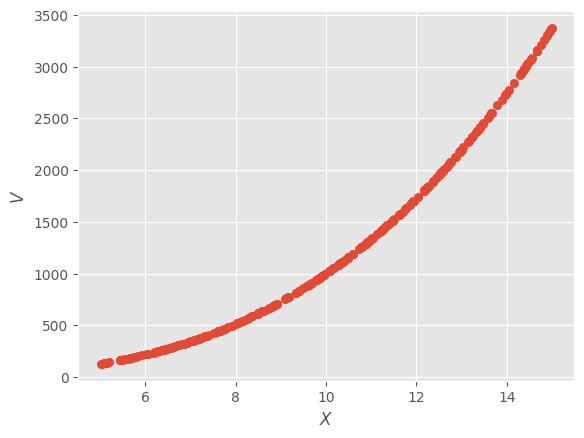

In [46]:
lam = 1
sample_U = []
for i in range(0, 300):
    u = lam * (sample1[i]**3) + (1 - lam) * sample2[i]**3
    sample_U.append(u)

plt.scatter(sample1, sample_U)
plt.ylabel('$V$')
plt.xlabel('$X$');

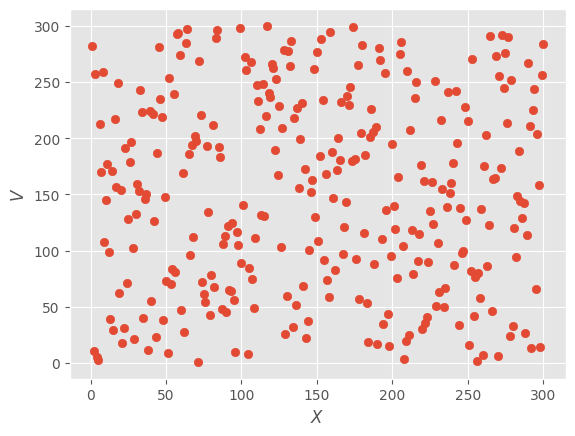

In [47]:
lam = 0
sample_V = []
for i in range(0, 300):
    v = lam * (sample1[i]**3) + (1 - lam) * sample2[i]**3
    sample_V.append(v)

sample_V_rank = stats.rankdata(sample_V)
sample1_rank = stats.rankdata(sample1)
plt.scatter(sample1_rank, sample_V_rank)
plt.ylabel('$V$')
plt.xlabel('$X$');

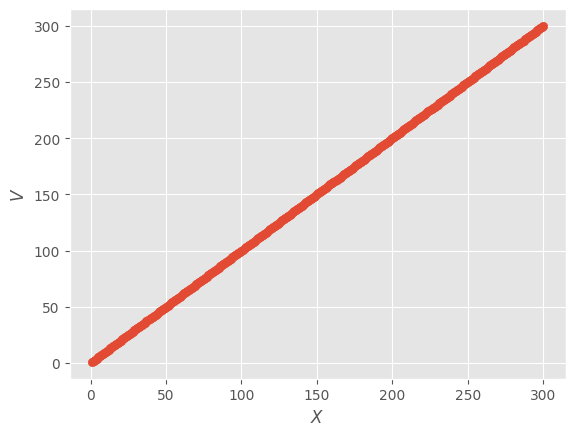

In [48]:
lam = 1
sample_V = []
for i in range(0, 300):
    v = lam * (sample1[i]**3) + (1 - lam) * sample2[i]**3
    sample_V.append(v)

sample_V_rank = stats.rankdata(sample_V)
sample1_rank = stats.rankdata(sample1)
plt.scatter(sample1_rank, sample_V_rank)
plt.ylabel('$V$')
plt.xlabel('$X$');